In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [305]:
path = r'C:\Users\Ananya\Documents\World Happiness Report'

In [306]:
report_2022 = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', '2022.csv'))

In [307]:
report_2022.head()

,Unnamed: 0,RANK,Country name,Happiness score,upperwhisker,lowerwhisker,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator
0,1,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005,Western Europe
1,2,90,Albania,5.199,5.321,5.076,1.718,1.439,0.646,0.719,0.511,0.138,0.028,Western Europe
2,3,96,Algeria,5.122,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150,Western Europe
3,4,57,Argentina,5.967,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085,Western Europe
4,5,82,Armenia,5.399,5.519,5.278,1.654,1.434,0.820,0.668,0.558,0.054,0.210,Western Europe


In [308]:
report_2022.columns

Index(['Unnamed: 0', 'RANK', 'Country name', 'Happiness score', 'upperwhisker',
       'lowerwhisker', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Regional indicator'],
      dtype='object')

In [309]:
report_2022_selected = report_2022[['Happiness score',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption']]

In [310]:
report_2022_selected.head()

,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,2.404,0.758,0.000,0.289,0.000,0.089,0.005
1,5.199,1.439,0.646,0.719,0.511,0.138,0.028
2,5.122,1.363,0.970,0.643,0.146,0.106,0.150
3,5.967,1.592,1.102,0.662,0.555,0.081,0.085
4,5.399,1.434,0.820,0.668,0.558,0.054,0.210


# Elbow technique

In [311]:
num_clusters = range(1, 10)

In [312]:
 # explain

In [313]:
kmeans = [KMeans(n_clusters=i) for i in num_clusters] 

In [314]:
score = [kmeans[i].fit(report_2022_selected).score(report_2022_selected) for i in range(len(kmeans))]
score

C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

[-219.38203052054806,
 -82.81259733003053,
 -54.19292194758798,
 -38.588274685000016,
 -29.985657709857524,
 -25.98651217959146,
 -22.944102422449895,
 -21.240389457194127,
 -19.66769063528245]

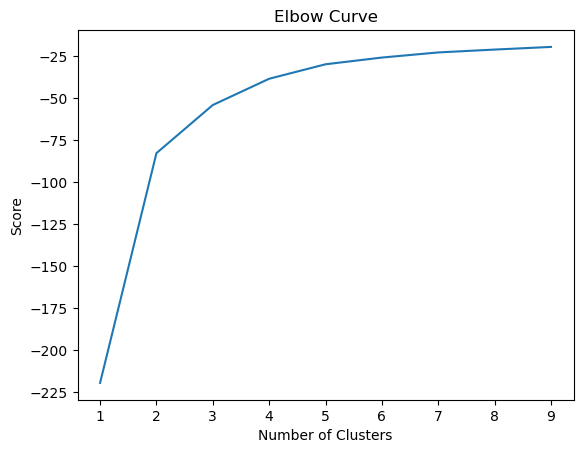

In [315]:
pl.plot(num_clusters, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. In the above elbow, you can see that it jumps rapidly from two to three on the x-axis, then rises only slightly after three

# K-means algorithm

In [316]:
kmeans = KMeans(n_clusters = 3) 

In [317]:
kmeans.fit(report_2022_selected)

C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

# Attach a new column to the dataframe with the resulting clusters 

In [318]:
report_2022_selected.loc[:, 'clusters'] = kmeans.fit_predict(report_2022_selected)

C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ananya\AppData\Local\Temp\ipykernel_10716\3542924392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_2022_selected.loc[:, 'clusters'] = kmeans.fit_predict(report_2022_selected)


In [319]:
report_2022_selected.head()

,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,clusters
0,2.404,0.758,0.000,0.289,0.000,0.089,0.005,0
1,5.199,1.439,0.646,0.719,0.511,0.138,0.028,2
2,5.122,1.363,0.970,0.643,0.146,0.106,0.150,2
3,5.967,1.592,1.102,0.662,0.555,0.081,0.085,2
4,5.399,1.434,0.820,0.668,0.558,0.054,0.210,2


In [320]:

report_2022_selected['clusters'].value_counts()

clusters
2    59
0    52
1    35
Name: count, dtype: int64

# Different visualizations (e.g., scatterplots) using your clustered data

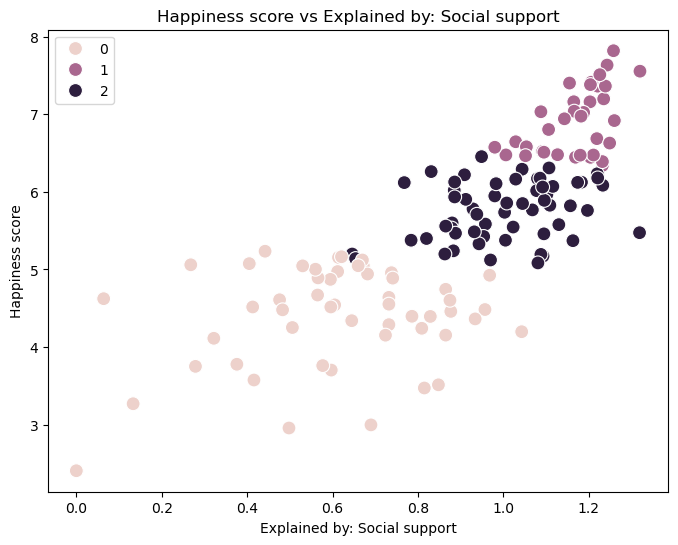

In [321]:
# Create scatterplot for Happiness score vs Explained by: Social support
plt.figure(figsize=(8, 6))
sns.scatterplot(x = report_2022_selected['Explained by: Social support'], y = report_2022_selected['Happiness score'], hue = kmeans.labels_, s = 100 )
plt.title('Happiness score vs Explained by: Social support')
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Social support')
plt.show()

Cluster 2 Represents higher Social Support results in higher happiness. 
Cluster 0 Represents with moderate Socail Support results in Moderate happiness.
Cluster 1 Represents with Low Social Support results in Lesser happiness.

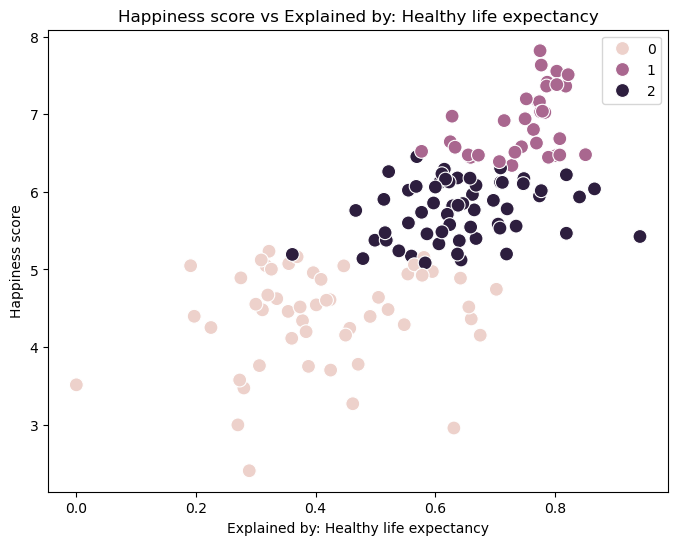

In [322]:
# Create scatterplot for Happiness score vs Explained by: Healthy life expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x = report_2022_selected['Explained by: Healthy life expectancy'], y = report_2022_selected['Happiness score'], hue = kmeans.labels_, s=100 )
plt.title('Happiness score vs Explained by: Healthy life expectancy')
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Healthy life expectancy')
plt.show()

Cluster 2 Represents higher Healthy life expectancy results in higher happiness. 
Cluster 0 Represents with moderate Healthy life expectancy results in Moderate happiness.
Cluster 1 Represents with Low Healthy life expectancy results in Lesser happiness.

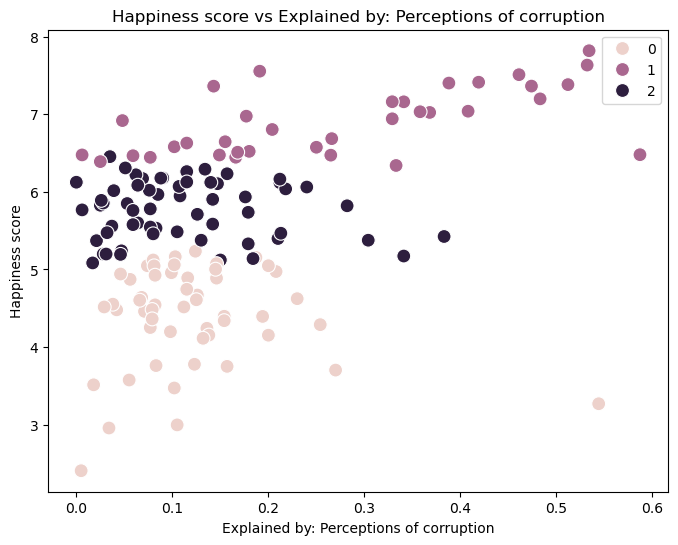

In [323]:
# Create scatterplot for Happiness score vs Explained by: Perceptions of corruption
plt.figure(figsize=(8, 6))
sns.scatterplot(x = report_2022_selected['Explained by: Perceptions of corruption'], y = report_2022_selected['Happiness score'], hue = kmeans.labels_, s = 100 )
plt.title('Happiness score vs Explained by: Perceptions of corruption')
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Perceptions of corruption')
plt.show()

Cluster 2 Shows distribution of data across scatterplot. this cluster shows that lower the corruption, higher the happiness.
Cluster 0 Represents with moderate the corruption results in Moderate happiness.
Cluster 1 Represents with Lower the corruption, Lesser happiness. this seems to be contradicting.

In [324]:
report_2022_selected.groupby('clusters').agg({'Explained by: Social support':['mean', 'median'], 
                         'Explained by: Healthy life expectancy':['mean', 'median'], 
                         'Explained by: Perceptions of corruption':['mean', 'median'],
                          'Happiness score':['mean', 'median']})

Explained by: Social support          \
                                 mean  median   
clusters                                        
0                            0.615538  0.6175   
1                            1.169686  1.1880   
2                            1.005237  1.0080   

         Explained by: Healthy life expectancy         \
                                          mean median   
clusters                                                
0                                     0.412923  0.392   
1                                     0.748943  0.774   
2                                     0.642305  0.637   

         Explained by: Perceptions of corruption        Happiness score         
                                            mean median            mean median  
clusters                                                                        
0                                       0.120962  0.104        4.401808  4.516  
1                                       0.274343  0.265        6.910971  6.920  
2                                       0.113661  0.088        5.763458  5.821

Cluster 0: This cluster has relatively lower mean and median values for features like social support, healthy life expectancy, and perceptions of corruption compared to other clusters. Despite these lower values, the happiness scores (both mean and median) in this cluster are also lower compared to other clusters, with a mean happiness score of around 4.40 and a median of 4.52. This suggests that countries in this cluster may be facing challenges related to social support, health, and corruption, which are impacting their overall happiness levels negatively.

Cluster 1: In this cluster, there are higher mean and median values for features such as social support, healthy life expectancy, and perceptions of corruption compared to Cluster 0. The happiness scores (both mean and median) in this cluster are notably higher, with a mean happiness score of around 6.91 and a median of 6.92. This indicates that countries in this cluster generally have better social support, health conditions, and lower corruption perceptions, leading to higher levels of happiness compared to Cluster 0.
There seems to be an inconsistency in the corruption data. one of the next step could be to check on the anamoly.
    
Cluster 2: This cluster exhibits intermediate values for social support, healthy life expectancy, and perceptions of corruption compared to the other two clusters. However, the happiness scores (both mean and median) in this cluster are higher than Cluster 0 but slightly lower than Cluster 1, with a mean happiness score of around 5.76 and a median of 5.82. This suggests that countries in this cluster enjoy moderate levels of social support, health conditions, and corruption perceptions, resulting in moderately high happiness levels.    